<a href="https://colab.research.google.com/github/AmanDubey28/AI-Smart-Agriculture/blob/main/Smart_Agriculture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# 1. LOAD THE DATA
# Make sure the file name matches exactly what you uploaded
try:
    df = pd.read_csv('Crop_recommendation.csv')
    print("✅ File loaded successfully!")
except:
    print("❌ Error: Could not find 'Crop_recommendation.csv'. Please upload it to Colab.")

# 2. HANDLE MISSING VALUES (Cleaning)
# The paper suggests 'Mean Imputation' - filling gaps with the average value
if df.isnull().values.any():
    print("Empty cells found. Filling them with average values...")
    df.fillna(df.mean(numeric_only=True), inplace=True)
else:
    print("✅ No missing values found.")

# 3. ENCODING (Converting text to numbers)
# Machines only understand numbers. We change crop names (like 'rice') into numbers (like 0, 1, 2)
label_encoder = LabelEncoder()
df['label_encoded'] = label_encoder.fit_transform(df['label'])

# Save the mapping so you know which number belongs to which crop
mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("\nCrop Mappings (Encoding):", mapping)

# 4. NORMALIZATION (Scaling)
# This scales values like N, P, K, and Rainfall between 0 and 1.
# This ensures that a high rainfall value doesn't "overpower" a small pH value.
scaler = MinMaxScaler()

# We select the feature columns (N, P, K, temperature, humidity, ph, rainfall)
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
df[features] = scaler.fit_transform(df[features])

# 5. SHOW RESULTS
print("\n✅ Preprocessing Complete!")
print("Here is a preview of your cleaned and normalized data:")
print(df.head())

# Optional: Download the cleaned data to your PC
df.to_csv('Cleaned_Crop_Data.csv', index=False)
print("\nCleaned file 'Cleaned_Crop_Data.csv' is ready.")

✅ File loaded successfully!
✅ No missing values found.

Crop Mappings (Encoding): {'apple': np.int64(0), 'banana': np.int64(1), 'blackgram': np.int64(2), 'chickpea': np.int64(3), 'coconut': np.int64(4), 'coffee': np.int64(5), 'cotton': np.int64(6), 'grapes': np.int64(7), 'jute': np.int64(8), 'kidneybeans': np.int64(9), 'lentil': np.int64(10), 'maize': np.int64(11), 'mango': np.int64(12), 'mothbeans': np.int64(13), 'mungbean': np.int64(14), 'muskmelon': np.int64(15), 'orange': np.int64(16), 'papaya': np.int64(17), 'pigeonpeas': np.int64(18), 'pomegranate': np.int64(19), 'rice': np.int64(20), 'watermelon': np.int64(21)}

✅ Preprocessing Complete!
Here is a preview of your cleaned and normalized data:
          N         P      K  temperature  humidity        ph  rainfall label  \
0  0.642857  0.264286  0.190     0.345886  0.790267  0.466264  0.656458  rice   
1  0.607143  0.378571  0.180     0.371445  0.770633  0.549480  0.741675  rice   
2  0.428571  0.357143  0.195     0.406854  0.7939

In [2]:
!pip install pytorch-tabnet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 2.2 MB/s eta 0:00:00


/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


Training started... This will take a minute but will be much more accurate.
epoch 0  | loss: 3.76488 | train_accuracy: 0.02784 | valid_accuracy: 0.01364 |  0:00:04s
epoch 1  | loss: 3.23773 | train_accuracy: 0.04545 | valid_accuracy: 0.02727 |  0:00:06s
epoch 2  | loss: 3.01489 | train_accuracy: 0.06648 | valid_accuracy: 0.06136 |  0:00:09s
epoch 3  | loss: 2.85762 | train_accuracy: 0.12386 | valid_accuracy: 0.10227 |  0:00:13s
epoch 4  | loss: 2.73562 | train_accuracy: 0.19375 | valid_accuracy: 0.175   |  0:00:15s
epoch 5  | loss: 2.60558 | train_accuracy: 0.30455 | valid_accuracy: 0.27955 |  0:00:16s
epoch 6  | loss: 2.50278 | train_accuracy: 0.32841 | valid_accuracy: 0.29318 |  0:00:17s
epoch 7  | loss: 2.4124  | train_accuracy: 0.36648 | valid_accuracy: 0.34091 |  0:00:19s
epoch 8  | loss: 2.25688 | train_accuracy: 0.42273 | valid_accuracy: 0.41818 |  0:00:20s
epoch 9  | loss: 2.12203 | train_accuracy: 0.46193 | valid_accuracy: 0.45    |  0:00:21s
epoch 10 | loss: 2.01022 | train_a

/usr/local/lib/python3.12/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)



✅ SUCCESS! Final Test Accuracy: 96.82%


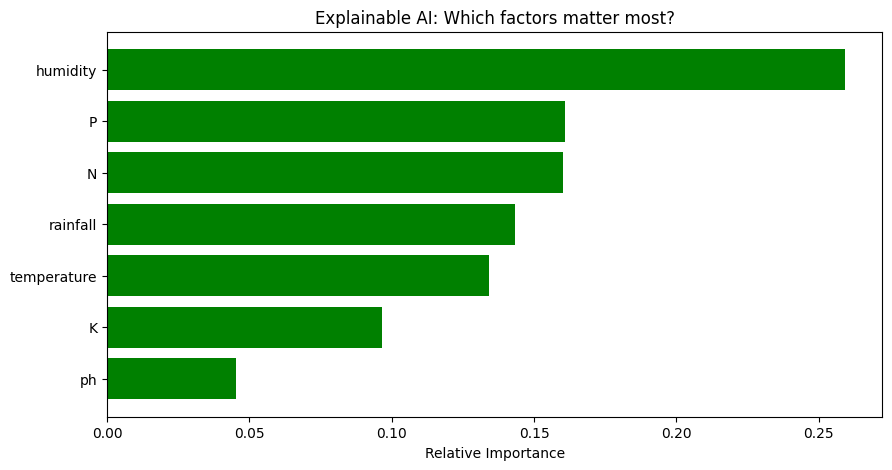

Successfully saved model at crop_recommendation_model.zip
Model saved as 'crop_recommendation_model.zip'


In [5]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pytorch_tabnet.tab_model import TabNetClassifier
import torch

# 2. LOAD YOUR CLEANED DATA
df = pd.read_csv('Cleaned_Crop_Data.csv')

# 3. PREPARE INPUTS AND OUTPUTS
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
X = df[features].values
y = df['label_encoded'].values

# Split: 80% to learn, 20% to test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. SET UP THE BRAIN (Optimized per Research Paper logic)
clf = TabNetClassifier(
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=1e-3), # Lower learning rate for better stability
    scheduler_params={"step_size":10, "gamma":0.9},
    scheduler_fn=torch.optim.lr_scheduler.StepLR,
    mask_type='entmax'
)

# 5. TRAINING (Wait for the progress bar)
print("Training started... This will take a minute but will be much more accurate.")
clf.fit(
    X_train=X_train, y_train=y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    eval_name=['train', 'valid'],
    eval_metric=['accuracy'],
    max_epochs=100,      # Give it more time to learn
    patience=15,         # Stop early if it stops improving
    batch_size=32,       # Smaller batches help it learn small details
    virtual_batch_size=16
)

# 6. VERIFY ACCURACY
preds = clf.predict(X_test)
final_acc = np.mean(preds == y_test)
print(f"\n✅ SUCCESS! Final Test Accuracy: {final_acc * 100:.2f}%")

# 7. EXPLAINABLE AI (XAI) - Feature Importance
# This shows which sensor data was most important, as requested in the paper.
importances = clf.feature_importances_
feature_names = features
indices = np.argsort(importances)

plt.figure(figsize=(10, 5))
plt.title("Explainable AI: Which factors matter most?")
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# 8. SAVE THE MODEL
# We save this "trained brain" so you can use it in your Streamlit app later
import joblib
clf.save_model('crop_recommendation_model')
print("Model saved as 'crop_recommendation_model.zip'")

In [6]:
import joblib

# 1. Save the Scaler (to process user input later)
joblib.dump(scaler, 'scaler.joblib')

# 2. Save the Label Encoder (to turn numbers back into crop names like 'Rice')
joblib.dump(label_encoder, 'label_encoder.joblib')

print("✅ Scaler and Encoder saved! Download 'scaler.joblib' and 'label_encoder.joblib' from the files tab.")

✅ Scaler and Encoder saved! Download 'scaler.joblib' and 'label_encoder.joblib' from the files tab.
